In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
file_path = '/content/drive/MyDrive/TrafficTwoMonth.csv'
data = pd.read_csv(file_path)


In [4]:
data.head()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,13,2,2,24,41,normal
1,12:15:00 AM,10,Tuesday,14,1,1,36,52,normal
2,12:30:00 AM,10,Tuesday,10,2,2,32,46,normal
3,12:45:00 AM,10,Tuesday,10,2,2,36,50,normal
4,1:00:00 AM,10,Tuesday,11,2,1,34,48,normal


In [5]:
data.info()
data.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5952 entries, 0 to 5951
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Time               5952 non-null   object
 1   Date               5952 non-null   int64 
 2   Day of the week    5952 non-null   object
 3   CarCount           5952 non-null   int64 
 4   BikeCount          5952 non-null   int64 
 5   BusCount           5952 non-null   int64 
 6   TruckCount         5952 non-null   int64 
 7   Total              5952 non-null   int64 
 8   Traffic Situation  5952 non-null   object
dtypes: int64(6), object(3)
memory usage: 418.6+ KB


,0
Time,0
Date,0
Day of the week,0
CarCount,0
BikeCount,0
BusCount,0
TruckCount,0
Total,0
Traffic Situation,0


In [6]:
print(data.head())


          Time  Date Day of the week  CarCount  BikeCount  BusCount  \
0  12:00:00 AM    10         Tuesday        13          2         2   
1  12:15:00 AM    10         Tuesday        14          1         1   
2  12:30:00 AM    10         Tuesday        10          2         2   
3  12:45:00 AM    10         Tuesday        10          2         2   
4   1:00:00 AM    10         Tuesday        11          2         1   

   TruckCount  Total Traffic Situation  
0          24     41            normal  
1          36     52            normal  
2          32     46            normal  
3          36     50            normal  
4          34     48            normal  


In [7]:
print(data.describe())


              Date     CarCount    BikeCount     BusCount   TruckCount  \
count  5952.000000  5952.000000  5952.000000  5952.000000  5952.000000   
mean     16.000000    65.440692    12.161458    12.912970    18.646337   
std       8.945023    44.749335    11.537944    12.497736    10.973139   
min       1.000000     5.000000     0.000000     0.000000     0.000000   
25%       8.000000    18.750000     3.000000     2.000000    10.000000   
50%      16.000000    62.000000     9.000000    10.000000    18.000000   
75%      24.000000   103.000000    19.000000    20.000000    27.000000   
max      31.000000   180.000000    70.000000    50.000000    60.000000   

             Total  
count  5952.000000  
mean    109.161458  
std      55.996312  
min      21.000000  
25%      54.000000  
50%     104.000000  
75%     153.000000  
max     279.000000  


In [8]:

# Print column names
print("Columns in dataset:", data.columns)

# Convert 'Time' to datetime format and extract the hour
data['Hour'] = pd.to_datetime(data['Time']).dt.hour

# Drop 'Time' and 'Date' columns if not needed
data = data.drop(columns=['Time', 'Date'], errors='ignore')

# Encode 'Traffic Situation' as numerical labels
data['Traffic Situation'] = data['Traffic Situation'].astype('category').cat.codes

# Display processed dataset
print(data.head())

Columns in dataset: Index(['Time', 'Date', 'Day of the week', 'CarCount', 'BikeCount', 'BusCount',
       'TruckCount', 'Total', 'Traffic Situation'],
      dtype='object')
  Day of the week  CarCount  BikeCount  BusCount  TruckCount  Total  \
0         Tuesday        13          2         2          24     41   
1         Tuesday        14          1         1          36     52   
2         Tuesday        10          2         2          32     46   
3         Tuesday        10          2         2          36     50   
4         Tuesday        11          2         1          34     48   

   Traffic Situation  Hour  
0                  3     0  
1                  3     0  
2                  3     0  
3                  3     0  
4                  3     1  


<ipython-input-8-eeb3d7d6f6bd>:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Hour'] = pd.to_datetime(data['Time']).dt.hour


In [9]:


# Print column names to confirm
print("Columns in dataset:", data.columns)

# Since 'Date' is missing, we do not need to convert it
# Extract Hour (already present in the dataset)
data['Hour'] = data['Hour'].astype(int)  # Ensure Hour is integer

# Encode 'Traffic Situation' as numerical labels
data['Traffic Situation'] = data['Traffic Situation'].astype('category').cat.codes

# Display processed dataset
print(data.head())




Columns in dataset: Index(['Day of the week', 'CarCount', 'BikeCount', 'BusCount', 'TruckCount',
       'Total', 'Traffic Situation', 'Hour'],
      dtype='object')
  Day of the week  CarCount  BikeCount  BusCount  TruckCount  Total  \
0         Tuesday        13          2         2          24     41   
1         Tuesday        14          1         1          36     52   
2         Tuesday        10          2         2          32     46   
3         Tuesday        10          2         2          36     50   
4         Tuesday        11          2         1          34     48   

   Traffic Situation  Hour  
0                  3     0  
1                  3     0  
2                  3     0  
3                  3     0  
4                  3     1  


In [10]:
from sklearn.preprocessing import LabelEncoder

# Convert 'DayOfWeek' to numerical values
label_encoder = LabelEncoder()
data['Day of the week'] = label_encoder.fit_transform(data['Day of the week'])


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define features (X) and target (y)
X = data[['CarCount', 'BikeCount', 'BusCount', 'TruckCount', 'Hour', 'Day of the week']]
y = data['Total']  # Predicting total traffic flow

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print results
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")




Mean Absolute Error (MAE): 2.194172963895886
Mean Squared Error (MSE): 10.226987573467671
R² Score: 0.9967081794305374


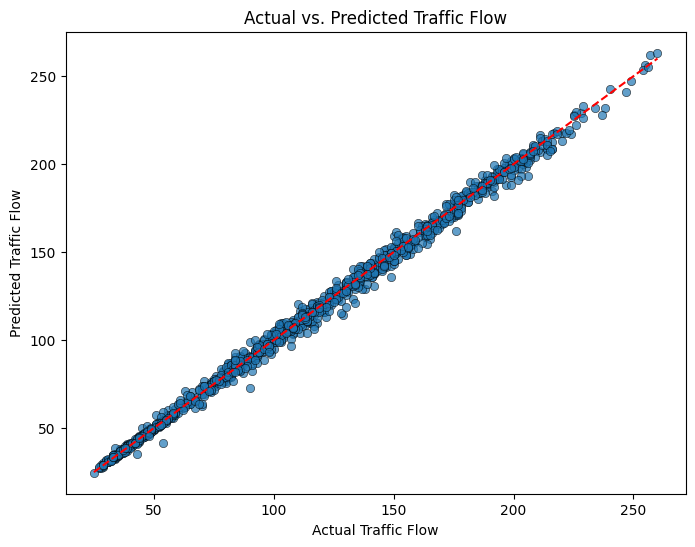

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot: Actual vs. Predicted Traffic Flow
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7, edgecolor="k")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # 45-degree line
plt.xlabel("Actual Traffic Flow")
plt.ylabel("Predicted Traffic Flow")
plt.title("Actual vs. Predicted Traffic Flow")
plt.show()



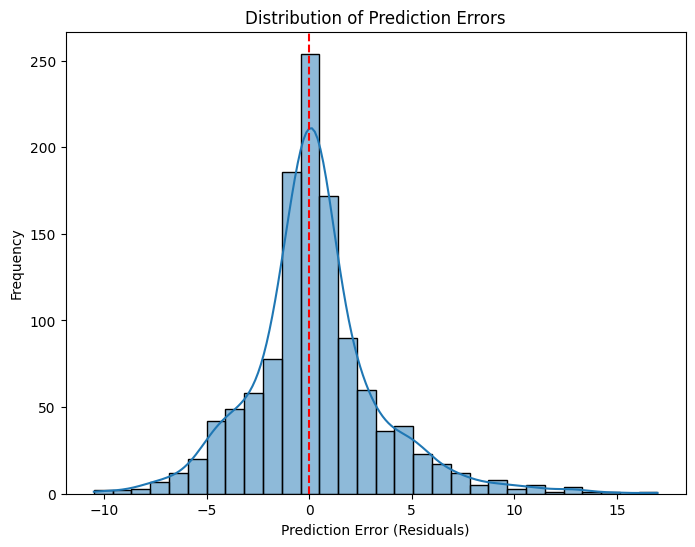

In [13]:
# Calculate residuals (errors)
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=30, kde=True)
plt.axvline(0, color='red', linestyle='--')
plt.xlabel("Prediction Error (Residuals)")
plt.ylabel("Frequency")
plt.title("Distribution of Prediction Errors")
plt.show()


<ipython-input-14-33bde4fe9aed>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importance_df['Importance'], y=importance_df['Feature'], palette="viridis")


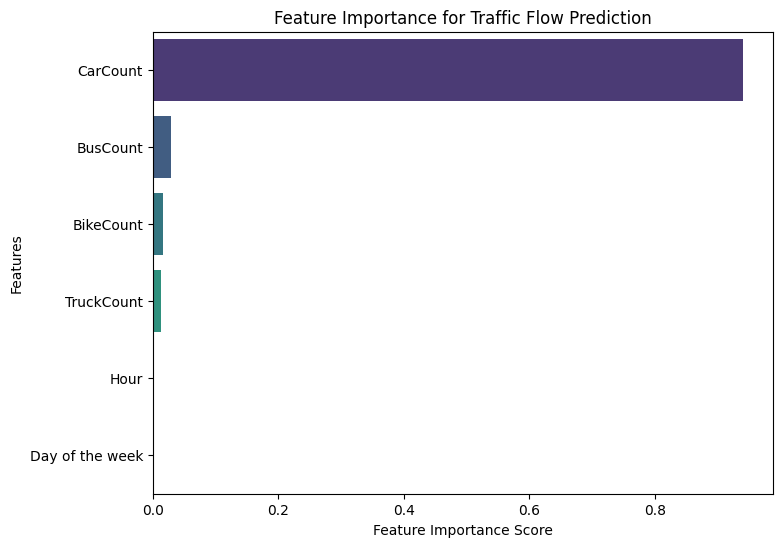

In [14]:
# Get feature importances from the trained model
feature_importance = model.feature_importances_
feature_names = X.columns

# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(8, 6))
sns.barplot(x=importance_df['Importance'], y=importance_df['Feature'], palette="viridis")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance for Traffic Flow Prediction")
plt.show()



In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Define a better hyperparameter grid
param_grid = {
    'n_estimators': [100, 150, 200],  # More trees for stability
    'max_depth': [5, 10],  # Limit tree depth
    'min_samples_split': [10, 20, 30],  # Increase from 2
    'min_samples_leaf': [4, 8, 12]  # Increase from 1
}

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    scoring='r2',
    cv=5,
    n_jobs=-1,
    verbose=2
)

# Perform hyperparameter tuning
grid_search.fit(X_train, y_train)

# Get the best parameters & model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate best model
train_r2 = best_model.score(X_train, y_train)
test_r2 = best_model.score(X_test, y_test)

print("Best Hyperparameters:", best_params)
print("Train R² Score:", train_r2)
print("Test R² Score:", test_r2)


Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Train R² Score: 0.9978645993045301
Test R² Score: 0.995057572704176


In [16]:
# Evaluate the best model on training data
train_r2 = best_model.score(X_train, y_train)

# Evaluate the best model on test data
test_r2 = best_model.score(X_test, y_test)

print("Train R² Score:", train_r2)
print("Test R² Score:", test_r2)


Train R² Score: 0.9978645993045301
Test R² Score: 0.995057572704176


In [17]:
import pandas as pd

# Define correct paths for your files
data = "/content/drive/My Drive/TrafficTwoMonth.csv"  # Update this
data2 = "/content/drive/My Drive/Traffic.csv"  # Update this

# Load both datasets
df1 = pd.read_csv(data)
df2 = pd.read_csv(data2)

# Merge the datasets
merged_df = pd.concat([df1, df2], ignore_index=True)

# Save the merged file (optional)
merged_df.to_csv("/content/drive/My Drive/Merged_Traffic.csv", index=False)

# Display merged dataset
print(merged_df.head())


          Time  Date Day of the week  CarCount  BikeCount  BusCount  \
0  12:00:00 AM    10         Tuesday        13          2         2   
1  12:15:00 AM    10         Tuesday        14          1         1   
2  12:30:00 AM    10         Tuesday        10          2         2   
3  12:45:00 AM    10         Tuesday        10          2         2   
4   1:00:00 AM    10         Tuesday        11          2         1   

   TruckCount  Total Traffic Situation  
0          24     41            normal  
1          36     52            normal  
2          32     46            normal  
3          36     50            normal  
4          34     48            normal  


In [18]:
import pandas as pd

# Load your merged dataset
data = pd.read_csv("/content/drive/My Drive/Merged_Traffic.csv")  # Replace with actual file path

# Drop unnecessary columns
data.drop(columns=['Time', 'Date'], inplace=True)

# Encode 'Day of the week' (Ordinal Encoding)
days_mapping = {'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5, 'Saturday': 6, 'Sunday': 7}
data['Day of the week'] = data['Day of the week'].map(days_mapping)

# Encode 'Traffic Situation' (Label Encoding)
data['Traffic Situation'] = data['Traffic Situation'].astype('category').cat.codes

# Display processed data
print(data.head())


   Day of the week  CarCount  BikeCount  BusCount  TruckCount  Total  \
0                2        13          2         2          24     41   
1                2        14          1         1          36     52   
2                2        10          2         2          32     46   
3                2        10          2         2          36     50   
4                2        11          2         1          34     48   

   Traffic Situation  
0                  3  
1                  3  
2                  3  
3                  3  
4                  3  


In [19]:
print(data.columns)  # Check available column names


Index(['Day of the week', 'CarCount', 'BikeCount', 'BusCount', 'TruckCount',
       'Total', 'Traffic Situation'],
      dtype='object')


In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the merged dataset
file_path = "/content/drive/My Drive/Merged_Traffic.csv"
data = pd.read_csv(file_path)

# Drop unnecessary columns
data.drop(columns=['Time', 'Date'], inplace=True, errors='ignore')

# Encode 'Day of the week'
days_mapping = {'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5, 'Saturday': 6, 'Sunday': 7}
data['Day of the week'] = data['Day of the week'].map(days_mapping)

# Define features (X) and target (y)
X = data[['CarCount', 'BikeCount', 'BusCount', 'TruckCount', 'Day of the week']]
y = data['Total']

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [21]:
print("Train Columns:", X_train.columns)
print("Test Columns:", X_test.columns)


Train Columns: Index(['CarCount', 'BikeCount', 'BusCount', 'TruckCount', 'Day of the week'], dtype='object')
Test Columns: Index(['CarCount', 'BikeCount', 'BusCount', 'TruckCount', 'Day of the week'], dtype='object')


In [22]:
# Define features and target
features = ['CarCount', 'BikeCount', 'BusCount', 'TruckCount', 'Day of the week']
target = 'Total'  # Change 'Vehicle Count' to 'Total'

# Extract new X and y
X_new = data[features]
y_new = data[target]

# Split the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.2, random_state=42)

# Train the model again
best_model.fit(X_train, y_train)

# Evaluate model
train_r2 = best_model.score(X_train, y_train)
test_r2 = best_model.score(X_test, y_test)

print(f"Train R² Score: {train_r2}")
print(f"Test R² Score: {test_r2}")


Train R² Score: 0.9985807843001936
Test R² Score: 0.9968801685164004


In [23]:
train_r2 = best_model.score(X_train, y_train)
test_r2 = best_model.score(X_test, y_test)

print(f"Train R² Score: {train_r2}")
print(f"Test R² Score: {test_r2}")


Train R² Score: 0.9985807843001936
Test R² Score: 0.9968801685164004


In [24]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Perform 5-fold cross-validation
cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='r2')

# Print results
print(f"Cross-Validation R² Scores: {cv_scores}")
print(f"Mean R² Score: {np.mean(cv_scores):.4f}")
print(f"Standard Deviation: {np.std(cv_scores):.4f}")


Cross-Validation R² Scores: [0.99674438 0.99675967 0.99667385 0.99667758 0.99662904]
Mean R² Score: 0.9967
Standard Deviation: 0.0000


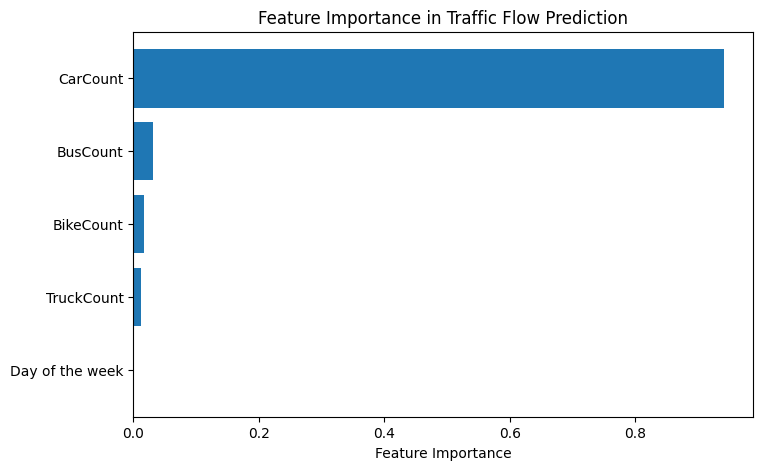

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# Extract feature importance
feature_importance = best_model.feature_importances_
feature_names = X_train.columns

# Sort feature importance for better visualization
sorted_idx = np.argsort(feature_importance)

plt.figure(figsize=(8, 5))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), np.array(feature_names)[sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Feature Importance in Traffic Flow Prediction")
plt.show()


In [26]:
import pandas as pd

# Create a DataFrame for future predictions (example)
future_data = pd.DataFrame({
    'CarCount': [150, 200],
    'BikeCount': [80, 90],
    'BusCount': [20, 25],
    'TruckCount': [10, 15],
    'Day of the week': [2, 4]  # Example: 2 for Tuesday, 4 for Thursday
})
# Predict future traffic flow
future_predictions = best_model.predict(future_data)

# Display results
future_data['Predicted Traffic Flow'] = future_predictions
print(future_data)


   CarCount  BikeCount  BusCount  TruckCount  Day of the week  \
0       150         80        20          10                2   
1       200         90        25          15                4   

   Predicted Traffic Flow  
0              232.826103  
1              263.030869  


In [27]:

def adjust_signal(predicted_flow):
    if predicted_flow < 150:
        green_time = 20  # Short green time for low traffic
    elif 150 <= predicted_flow < 300:
        green_time = 40  # Normal green time
    else:
        green_time = 60  # Long green time for heavy traffic

    return green_time

# Example prediction
predicted_traffic = 400  # Replace with real-time prediction
green_light_duration = adjust_signal(predicted_traffic)
print(f"Set Green Light Duration: {green_light_duration} seconds")


Set Green Light Duration: 60 seconds


In [28]:
predicted_traffic = 234  # Replace with real-time prediction
green_light_duration = adjust_signal(predicted_traffic)
print(f"Set Green Light Duration: {green_light_duration} seconds")

Set Green Light Duration: 40 seconds
